In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

In [2]:
N = 50
x_all = [0.0]*N
y_all = [0.0]*N
box = 10  # Angstrom

k=0
for i in range (0,int(N/5)):
    for j in range(0,int(N/10)):
        x_all[k] = i*0.1*box + (np.random.rand()-0.5)*0.05*box
        if math.fmod(i,2) == 0.0:
#            y_all[k] = j*0.2*box + (np.random.rand()-0.5)*0.1
            y_all[k] = j*0.2*box + (np.random.rand()-0.5)*0.05*box
        else:
#            y_all[k] = j*0.2*box + 0.1 + (np.random.rand()-0.5)*0.1
            y_all[k] = j*0.2*box + 0.1*box + (np.random.rand()-0.5)*0.05*box
        k=k+1

x_start = [0.0]*N
y_start = [0.0]*N
for i in range (0,N):
    x_start[i] = x_all[i]
    y_start[i] = y_all[i]


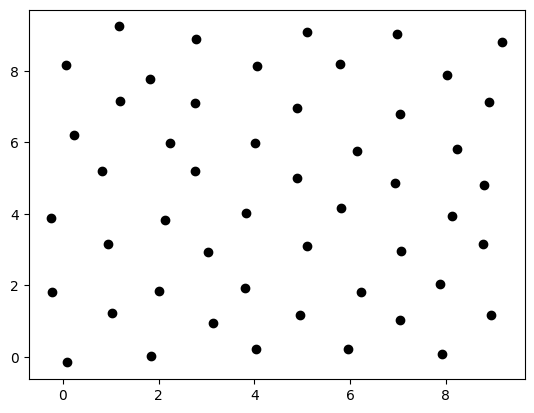

In [3]:
##  Visualize starting configuration  ##

for i in range(0,N):
    plt.scatter(x_start[i],y_start[i],c='k')
plt.show()


In [128]:
###  Use this for Simple Pairwise Potential  ##

def force(x_all,y_all):

    en = 0
    c = -1E-20/N  # Joules.Angstrom
#    c = -1
    rc = 5  # Angstrom
    forces_x = [0.0]*N
    forces_y = [0.0]*N

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)
            r = np.sqrt(xr*xr + yr*yr)
            if r <= rc:
                ff = (c/(r*r))*1E10  # converting to J/m
                forces_x[i] = forces_x[i] + ff*(xr/r)
                forces_x[j] = forces_x[j] - ff*(xr/r)
                forces_y[i] = forces_y[i] + ff*(yr/r)
                forces_y[j] = forces_y[j] - ff*(yr/r)
                en = en + c/r

    return(en,forces_x,forces_y)


In [129]:
en,forces_x,forces_y = force(x_start,y_start)

In [130]:
en

np.float64(-6.526556508228352e-20)

In [131]:
forces_y

[np.float64(4.009741693432889e-14),
 np.float64(-2.831151837989735e-13),
 np.float64(5.717567855926911e-14),
 np.float64(-1.177400713913475e-12),
 np.float64(6.348948895606787e-13),
 np.float64(1.3515654122399638e-12),
 np.float64(-5.378650427182564e-13),
 np.float64(2.3550968645100856e-13),
 np.float64(4.5267888181697123e-13),
 np.float64(-3.715146230895051e-13),
 np.float64(5.035672428814751e-13),
 np.float64(-1.2482785815275464e-12),
 np.float64(4.67539012883969e-13),
 np.float64(-6.141853366239741e-13),
 np.float64(4.245609047881415e-13),
 np.float64(1.639246890110866e-13),
 np.float64(2.6426264472902807e-13),
 np.float64(6.329584754910633e-13),
 np.float64(-9.97448461057376e-14),
 np.float64(-1.0124480709711157e-12),
 np.float64(-3.9807998596967694e-13),
 np.float64(-5.142569515257345e-13),
 np.float64(4.718819512578075e-13),
 np.float64(6.168166079403383e-13),
 np.float64(1.506670119498245e-13),
 np.float64(-1.6677310113424905e-13),
 np.float64(-4.2557288156705576e-13),
 np.float

In [133]:
###  Use this for Calculating Average Pairwise Distances  ##

def pair_distance(x_all,y_all):

    k = 0
    dist_avg = 0

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)
            r = np.sqrt(xr*xr + yr*yr)
            dist_avg = dist_avg + r
            k = k+1

    dist_avg = dist_avg/k

    return(dist_avg)


In [134]:
##  Define MD Parameters  ##

Temp_start = 300  # Kelvin
m = 4.48E-20  # kg
dt = 1e-12  # seconds
kB = 1.380649E-23  # J/K


In [135]:
def init():

    x = [0.0]*N
    y = [0.0]*N
    xm = [0.0]*N
    ym = [0.0]*N

    vx = [0.0]*N
    vy = [0.0]*N
    sumvx = 0
    sumvy = 0
    sumv2 = 0

    k = 0
    for i in range (0,int(N/5)):
        for j in range(0,int(N/10)):
            x[k] = i*0.1*box + (np.random.rand()-0.5)*0.05*box
            if math.fmod(i,2) == 0.0:
                y[k] = j*0.2*box + (np.random.rand()-0.5)*0.05*box
            else:
                y[k] = j*0.2*box + 0.1*box + (np.random.rand()-0.5)*0.05*box
            k=k+1

    k = 0
    for i in range (0,int(N/5)):
        for j in range(0,int(N/10)):
            xm[k] = i*0.1*box + (np.random.rand()-0.5)*0.01*box
            if xm[k] >= box:
                xm[k] = xm[k] - int(xm[k])
            if xm[k] < 0.0:
                xm[k] = xm[k] - int(xm[k]) + box
            if math.fmod(i,2) == 0.0:
                ym[k] = j*0.2*box + (np.random.rand()-0.5)*0.01*box
            else:
                ym[k] = j*0.2*box + 0.1*box + (np.random.rand()-0.5)*0.01*box
            if ym[k] >= box:
                ym[k] = ym[k] - int(ym[k])
            if ym[k] < 0.0:
                ym[k] = ym[k] - int(ym[k]) + box
            k=k+1

    for i in range(0,N):
        xr = x[i] - xm[i]
        xr = xr - box*np.round(xr/box)
        vx[i] = (xr/dt)*1E-10  # m/s
        yr = y[i] - ym[i]
        yr = yr - box*np.round(yr/box)
        vy[i] = (yr/dt)*1E-10  # m/s


    for i in range(0,N):
        sumvx = sumvx + vx[i]
        sumvy = sumvy + vy[i]
        sumv2 = sumv2 + vx[i]*vx[i] + vy[i]*vy[i]

    sumvx = sumvx/N
    sumvy = sumvy/N
    sumv2 = sumv2/(2*N)

    fs = np.sqrt(2*kB*Temp_start/(m*sumv2))
    sumv2 = 0

    for i in range(0,N):
        vx[i] = (vx[i] - sumvx)*fs
        vy[i] = (vy[i] - sumvy)*fs
        sumv2 = sumv2 + vx[i]*vx[i] + vy[i]*vy[i]
        xm[i] = x[i] - vx[i]*dt
        ym[i] = y[i] - vy[i]*dt

    PE_start, fx, fy = force(x,y)
    KE_start = (0.5*sumv2*m)
    Temp = KE_start/(kB*2*N)

    return(x, y, vx, vy, xm, ym, PE_start, KE_start, Temp)


In [136]:
x, y, vx, vy, xm, ym, PE_start, KE_start, Temp = init()

In [137]:
Temp_start

300

In [138]:
Temp

np.float64(299.59163114908677)

In [139]:
def integrate(en, forces_x, forces_y, x, xm, y, ym):

    sumvx = 0
    sumvy = 0
    sumv2 = 0
    vx = [0.0]*N
    vy = [0.0]*N

    for i in range(0,N):

#        xr = x[i] - xm[i]
#        xr = xr - box*np.round(xr/box)
#        xx = x[i] + xr + (dt*dt*forces_x[i]/m)*1E10
        xx = 2*x[i] - xm[i] + (dt*dt*forces_x[i]/m)*1E10
        if xx >= box:
          xx = xx - int(xx)
        if xx < 0.0:
          xx = xx - int(xx) + box

#        yr = y[i] - ym[i]
#        yr = yr - box*np.round(yr/box)
#        yy = 2*y[i] + yr + (dt*dt*forces_y[i]/m)*1E10
        yy = 2*y[i] - ym[i] + (dt*dt*forces_x[i]/m)*1E10
        if yy >= box:
          yy = yy - int(yy)
        if yy < 0.0:
          yy = yy - int(yy) + box

#        xr = xx - xm[i]
#        xr = xr - box*np.round(xr/box)
#        vx[i] = (xr/(2*dt))*1E-10  # m/s
        vx[i] = ((xx - xm[i])/(2*dt))*1E-10
#        yr = yy - ym[i]
#        yr = yr - box*np.round(yr/box)
#        vy[i] = (yr/(2*dt))*1E-10  # m/s
        vy[i] = ((yy - ym[i])/(2*dt))*1E-10
        sumvx = sumvx + vx[i]
        sumvy = sumvy + vy[i]
        sumv2 = sumv2 + vx[i]*vx[i] + vy[i]*vy[i]
        xm[i] = x[i]
        x[i] = xx
        ym[i] = y[i]
        y[i] = yy

    pot = en
    kin = (0.5*sumv2*m)
    etot = pot + kin
    Temp = kin/(kB*2*N)

#    etot = (en + 0.5*sumv2)/N

    return(Temp, pot, kin, etot, x, y, xm, ym)



In [140]:
def sample(x,y):

    return(pair_distance(x,y))


In [141]:
def md(tmax,dt,nsamp):

    x, y, vx, vy, xm, ym, pe_start, ke_start, temp_start = init()
    t = 0
    steps = round(tmax/dt)
    s = int(steps/nsamp)
    times = [0.0]*s
    PE = [0.0]*s
    KE = [0.0]*s
    TE = [0.0]*s
    Temp = [0.0]*s
    pair_dist = [0.0]*s
    k = 0
    x_start = copy.deepcopy(x)
    y_start = copy.deepcopy(y)

    for i in range(0,steps):
        en, fx, fy = force(x,y)
        T, pe, ke, te, x, y, xm, ym = integrate(en, fx, fy, x, xm, y, ym)
        t = t+dt
        if math.fmod(i, nsamp) == 0.0:
            k = int(i/nsamp)
            PE[k] = pe
            KE[k] = ke
            TE[k] = te
            Temp[k] = T
            times[k] = t
            pair_dist[k] = sample(x,y)
        # xm = copy.deepcopy(xm_new)
        # ym = copy.deepcopy(ym_new)
        # x = copy.deepcopy(x_new)
        # y = copy.deepcopy(y_new)

#     plt.plot(times[:], PE[:], c = 'r')
#     plt.plot(times[:], KE[:], c = 'b')
#     plt.plot(times[:], TE[:], c = 'grey')
#     plt.plot(times[:], Temp[:], c='k')
#     plt.plot(times[:], pair_dist[:], c = 'g')

    return(PE, KE, TE, Temp, x_start, y_start, x, y, pair_dist, times)



In [142]:
tmax = 5e-9 # seconds
dt = 1e-12  # seconds
nsamp = 10

PE, KE, TE, Temp, x_start, y_start, x_final, y_final, pair_dist, times = md(tmax,dt,nsamp)

# for i in range(0,len(times)):
#     PE[i] = PE[i]*1e+26
#     KE[i] = KE[i]*1e+26
#     TE[i] = TE[i]*1e+26


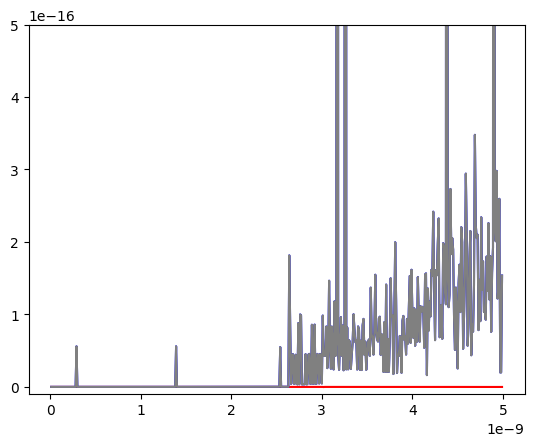

In [157]:

plt.ylim(-1e-17,5e-16)
#plt.yscale('log')
plt.plot(times[1:], PE[1:], c = 'r')
plt.plot(times[1:], KE[1:], c = 'b')
plt.plot(times[1:], TE[1:], c = 'grey')


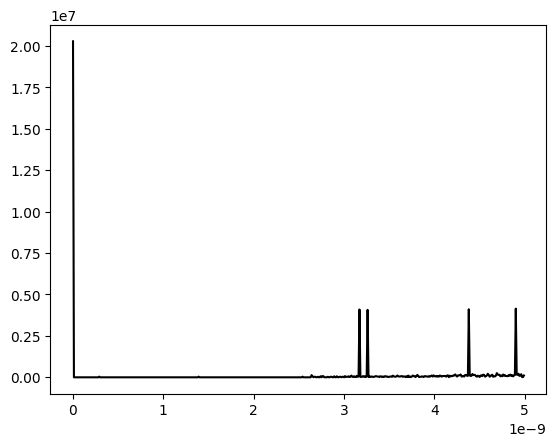

In [158]:
plt.plot(times[:], Temp[:], c='k')


In [159]:
Temp

[np.float64(20280317.22703264),
 np.float64(7.417137505653888e-05),
 np.float64(0.0003178470849377621),
 np.float64(0.0007323653024337614),
 np.float64(0.0013182609658364357),
 np.float64(0.0020762907497321233),
 np.float64(0.003007430231919779),
 np.float64(0.004112870013986783),
 np.float64(0.005394010635667897),
 np.float64(0.006852456080306457),
 np.float64(0.00849000562557582),
 np.float64(0.010308643741447526),
 np.float64(0.012310527702306975),
 np.float64(0.014497972506475868),
 np.float64(0.01687343266162495),
 np.float64(0.019439480333579524),
 np.float64(0.022198779297742777),
 np.float64(0.025154054085987285),
 np.float64(0.028306533136030564),
 np.float64(0.03165943404856454),
 np.float64(0.035216192500606744),
 np.float64(0.03897934672425835),
 np.float64(0.04295124578836221),
 np.float64(0.04713397591519452),
 np.float64(0.051529277689861014),
 np.float64(0.05613968503038601),
 np.float64(0.06096676241964326),
 np.float64(0.0660067332975638),
 np.float64(0.07125871057707

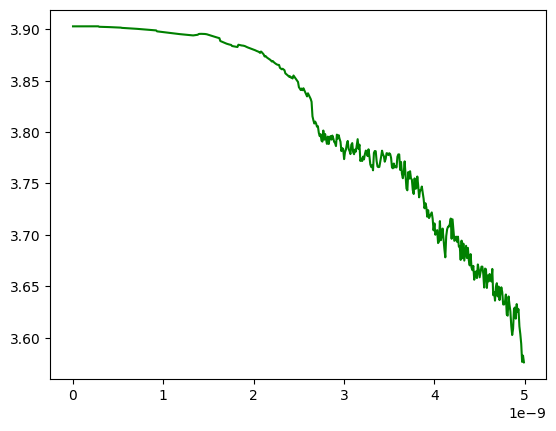

In [160]:
plt.plot(times[:], pair_dist[:], c = 'g')

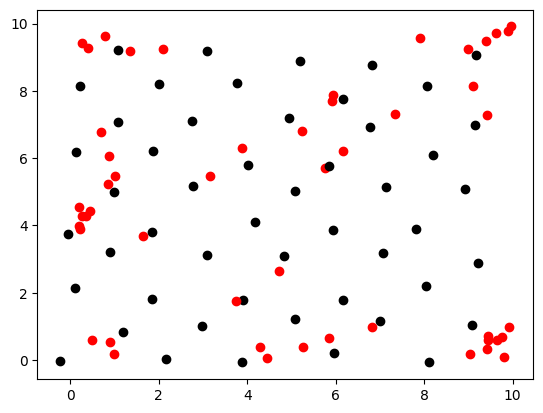

In [161]:
for i in range(0,N):
    plt.scatter(x_start[i],y_start[i],c='k')
    plt.scatter(x_final[i],y_final[i],c='r')
plt.show()


In [125]:
Temp_start

300

In [126]:
x, y, vx, vy, xm, ym, pe_start, ke_start, temp_start = init()

In [127]:
temp_start

np.float64(298.75870264168424)

In [ ]:
## Run this cell only for Anderson thermostat (to keep temp fixed) ##

def integrate(switch, en, forces_x, forces_y, x, y, vx, vy, temp, dt):

    sumv2 = 0
    vx = [0.0]*N
    vy = [0.0]*N
    nu = 8*(1e11)
    Temp = 0


    if switch == 1:

        for i in range(0,N):

            x[i] = x[i] + vx[i]*(1E10)*dt + dt*dt*forces_x[i]*(1E10)/(2*m)
            if x[i] >= box:
                x[i] = x[i] - int(x[i])
            if x[i] < 0.0:
                x[i] = x[i] - int(x[i]) + box
            vx[i] = vx[i] + dt*forces_x[i]/(2*m)

            y[i] = y[i] + vy[i]*(1E10)*dt + dt*dt*forces_y[i]*(1E10)/(2*m)
            if y[i] >= box:
                y[i] = y[i] - int(y[i])
            if y[i] < 0.0:
                y[i] = y[i] - int(y[i]) + box
            vy[i] = vy[i] + dt*forces_y[i]/(2*m)


    elif switch == 2:

        tempa = 0

        for i in range(0,N):
            vx[i] = vx[i] + dt*forces_x[i]/(2*m)
            vy[i] = vy[i] + dt*forces_y[i]/(2*m)
            tempa = tempa + ((vx[i]*vx[i]+vy[i]*vy[i])*m)/kB
        tempa = tempa/(2*N)
        sigma = np.sqrt(kB*temp/m)
        samples = np.random.normal(loc=0, scale=sigma, size=1000)
        for i in range(0,N):
            if np.random.rand() < nu*dt:
                vx[i] = samples[np.random.randint(0,1000)]
                vy[i] = samples[np.random.randint(0,1000)]

        Temp = Temp + tempa

    sumv2 = sumv2 + vx[i]*vx[i] + vy[i]*vy[i]

    pot = en
    kin = (0.5*sumv2*m)
    etot = pot + kin
#    Temp = kin/kB

#    etot = (en + 0.5*sumv2)/N

    return(Temp, pot, kin, etot, x, y, vx, vy)



In [ ]:
sigma = np.sqrt(2*kB*Temp_start/m)
samples = np.random.normal(loc=0, scale=sigma, size=1000)
vx = [0.0]*N
vy = [0.0]*N
sumv2 = 0
for i in range(0,N):
    vx[i] = samples[np.random.randint(0,1000)]
    vy[i] = samples[np.random.randint(0,1000)]
    sumv2 = sumv2 + vx[i]*vx[i] + vy[i]*vy[i]
print(Temp_start, ',', m*sumv2/(2*N*kB))

300 , 618.9701977662103


In [ ]:
nu = 5*(1e11)
print(nu*dt)

0.5


In [ ]:
m*samples[0]*samples[0]/kB

49.252351982879944

In [ ]:
## Example of Gaussian distribution ##

import numpy as np

sigma = 2.5  # Set the desired sigma value
samples = np.random.normal(loc=0, scale=sigma, size=1000)

# Print some of the samples
print(samples[:10])

plt.hist(samples, bins=50)
plt.show()

In [ ]:
def md_anderson(tmax,dt,nsamp,T):

    x, y, vx, vy, xm, ym, pe_start, ke_start, temp_start = init()
    en, fx, fy = force(x,y)
    t = 0
    steps = round(tmax/dt)
    s = int(steps/nsamp)
    times = [0.0]*s
    PE = [0.0]*s
    KE = [0.0]*s
    TE = [0.0]*s
    Temp = [0.0]*s
    pair_dist = [0.0]*s

    x_start = copy.deepcopy(x)
    y_start = copy.deepcopy(y)
    k = 0

    for i in range(0,steps):
        T, pe, ke, te, x, y, vx, vy = integrate(1, en, fx, fy, x, y, vx, vy, T, dt)
        en, fx, fy = force(x,y)
        T, pe, ke, te, x, y, vx, vy = integrate(2, en, fx, fy, x, y, vx, vy, T, dt)
        t = t+dt
        if math.fmod(i, nsamp) == 0.0:
            k = int(i/nsamp)
            PE[k] = pe
            KE[k] = ke
            TE[k] = te
            Temp[k] = T
            times[k] = t
            pair_dist[k] = sample(x,y)

    return(PE, KE, TE, Temp, x_start, y_start, x, y, pair_dist, times)


In [ ]:
Temp_hold = 300  # Kelvin
tmax = 1e-9 # seconds
dt = 1e-12  # seconds
nsamp = 10

PE, KE, TE, Temp, x_start, y_start, x_final, y_final, pair_dist, times = md_anderson(tmax,dt,nsamp,Temp_hold)


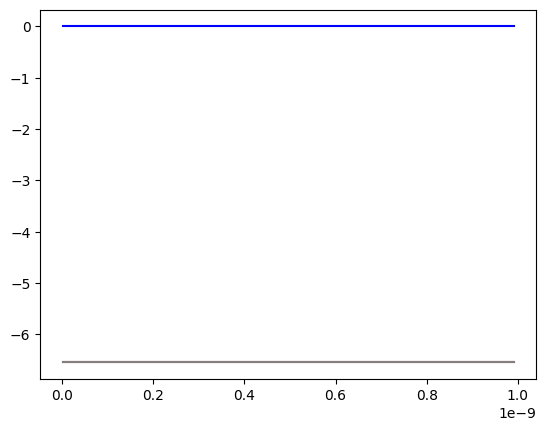

In [ ]:
for i in range(0,len(times)):
    PE[i] = PE[i]*1e26
    KE[i] = KE[i]*1e26
    TE[i] = TE[i]*1e26

plt.plot(times[:], PE[:], c = 'r')
plt.plot(times[:], KE[:], c = 'b')
plt.plot(times[:], TE[:], c = 'grey')


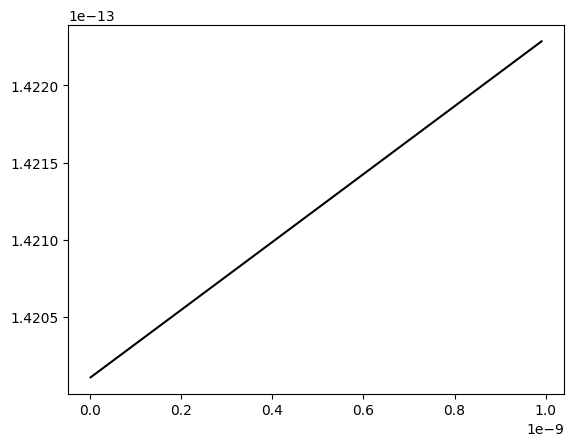

In [ ]:
plt.plot(times[:], Temp[:], c='k')


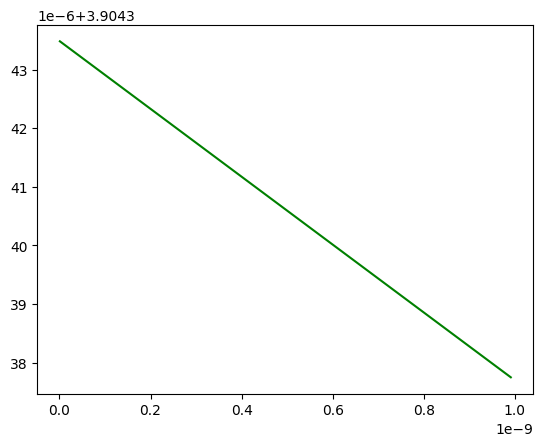

In [ ]:
plt.plot(times[:], pair_dist[:], c = 'g')


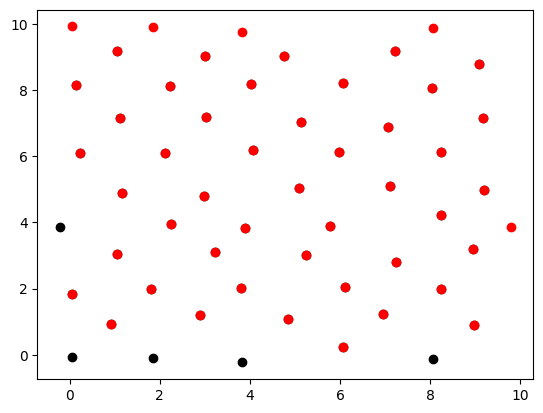

In [ ]:
for i in range(0,N):
    plt.scatter(x_start[i],y_start[i],c='k')
    plt.scatter(x_final[i],y_final[i],c='r')
plt.show()


In [ ]:
###  Use this for Lennard Jones Potential  ##
###  (https://en.wikipedia.org/wiki/Lennard-Jones_potential)

def force(x_all,y_all):

    en = 0
    forces_x = [0.0]*N
    forces_y = [0.0]*N
    rc = 0.2
    eps = 1e-42

    for i in range (0,N-1):
        for j in range (i+1,N):
            xr = x_all[i] - x_all[j]
            xr = xr - box*np.round(xr/box)
            yr = y_all[i] - y_all[j]
            yr = yr - box*np.round(yr/box)

            r2 = xr*xr + yr*yr

            if r2 <= rc*rc:
                r2i = 1/r2
                r6i = np.power(r2i,3)
                ff = 48*eps*r2i*r6i*(r6i-0.5)
                forces_x[i] = forces_x[i] + ff*xr
                forces_x[j] = forces_x[j] - ff*xr
                forces_y[i] = forces_y[i] + ff*yr
                forces_y[j] = forces_y[j] - ff*yr
                en = (en + 4*eps*r6i*(r6i-1))

    return(en,forces_x,forces_y)
